In [380]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [381]:
sns.set(rc={'figure.figsize': (10,10)})
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)

In [382]:
df=pd.read_csv("/content/drive/MyDrive/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [384]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [385]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [386]:
df['sex']=df['sex'].astype("category")
df['smoker']=df['smoker'].astype("category")
df['region']=df['region'].astype("category")
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [387]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


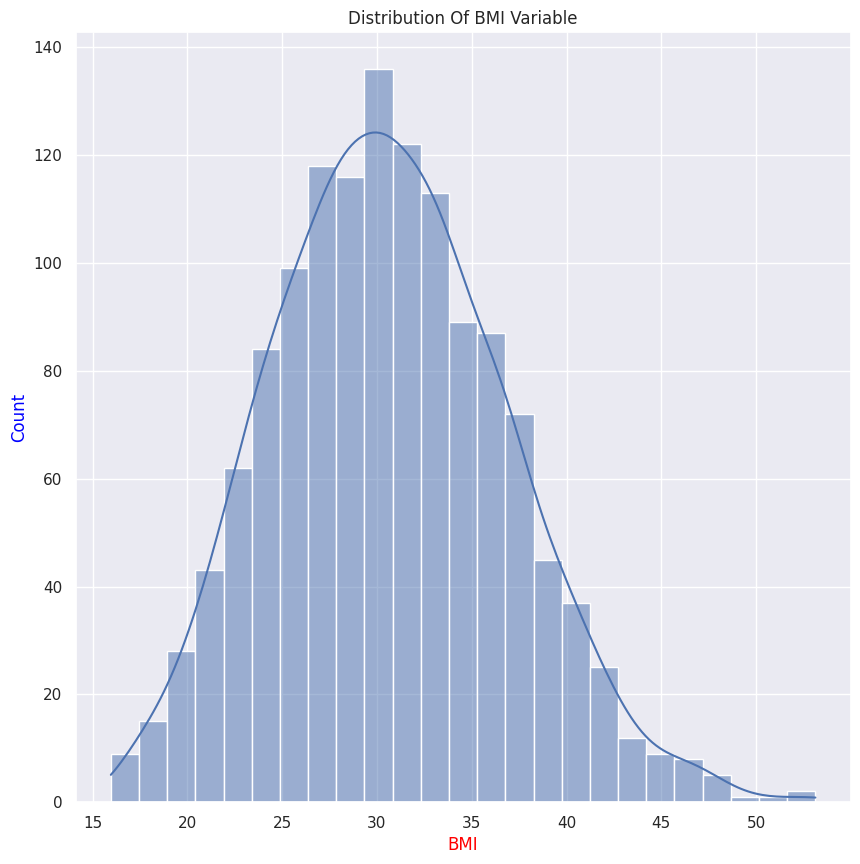

In [388]:
sns.histplot(data=df, x="bmi",kde=True)
plt.title("Distribution Of BMI Variable")
plt.xlabel("BMI",color="red")
plt.ylabel("Count",color="blue")
plt.show()

Text(0.5, 1.0, 'Relationships Between Smoker And Charges Variables')

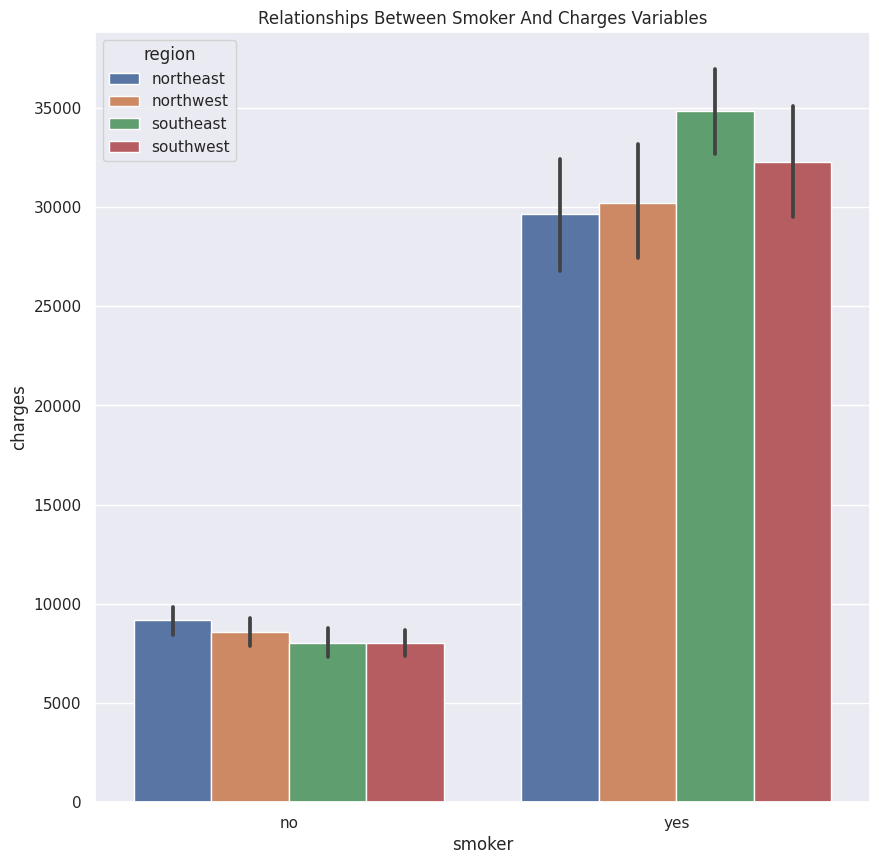

In [389]:
sns.barplot(data=df,x="smoker",y="charges",hue=df['region'])
plt.title("Relationships Between Smoker And Charges Variables")

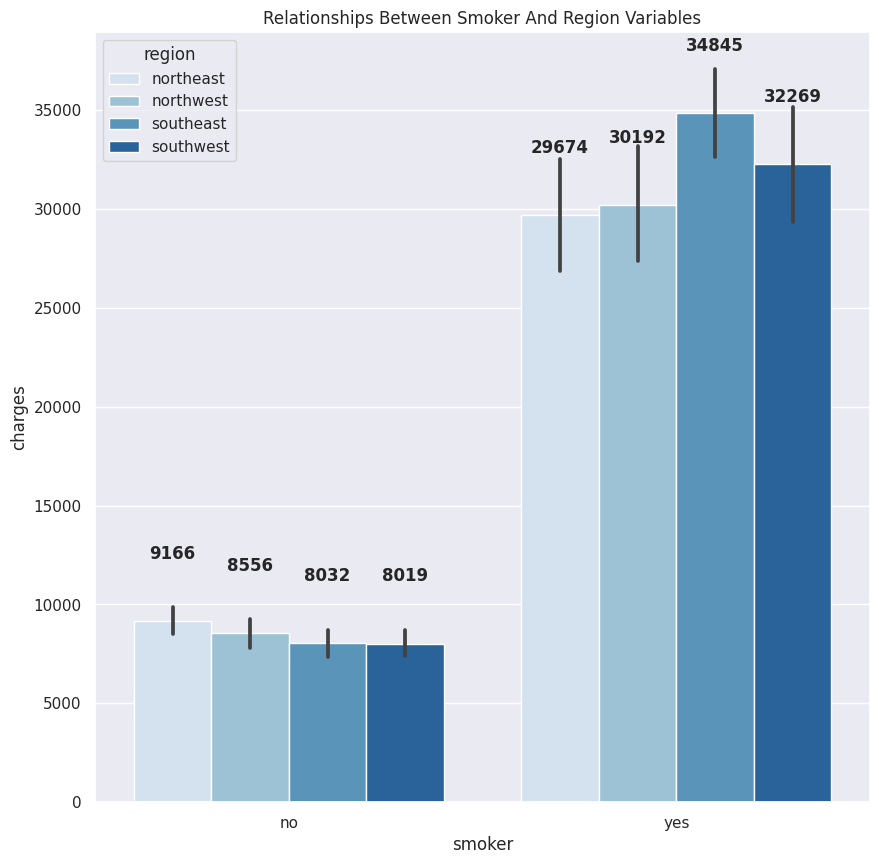

In [390]:
ax=sns.barplot(data=df,x="smoker",y="charges",hue="region",palette="Blues")
plt.title("Relationships Between Smoker And Region Variables")
for p in ax.patches:
   ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()+2700),
                ha = 'center', va = 'center',
                xytext = (0,10),
                textcoords = 'offset points',
                fontweight='bold')

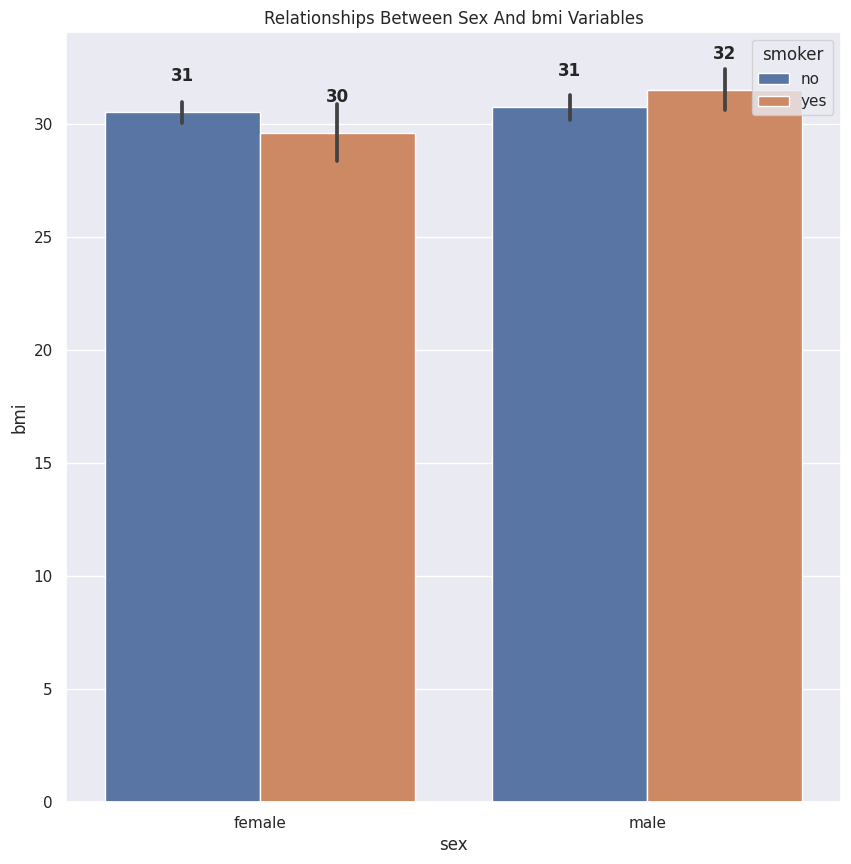

In [391]:
ax=sns.barplot(data=df,
            x="sex",y="bmi",hue="smoker")
plt.title("Relationships Between Sex And bmi Variables")
for p in ax.patches:
  ax.annotate(format(p.get_height(),".0f"),
              (p.get_x()+ p.get_width()/2,p.get_height()+1),
              ha = 'center', va = 'center',
              xytext=(0,10),
              textcoords="offset points",
              fontweight="bold")

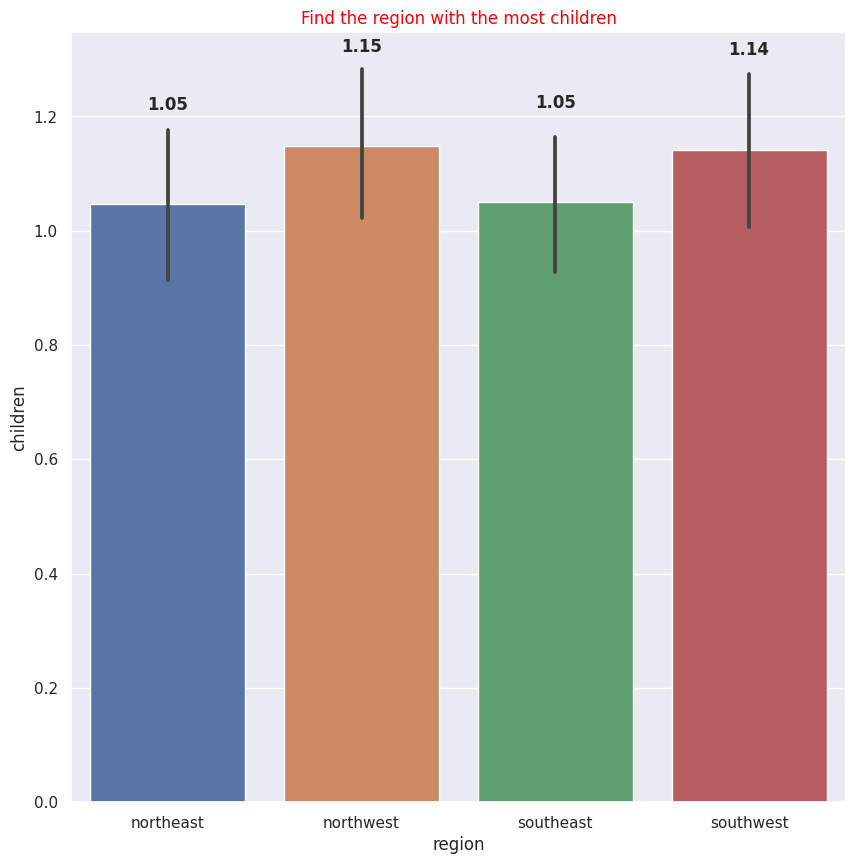

In [392]:
ax=sns.barplot(data=df,x="region",y="children")
plt.title("Find the region with the most children",color="red")

for p in ax.patches:
  ax.annotate(format(p.get_height(),".2f"),
              (p.get_x()+ p.get_width()/2,p.get_height()+0.15),
              ha = 'center', va = 'center',
              xytext=(0,10),
              textcoords="offset points",
              fontweight="bold")

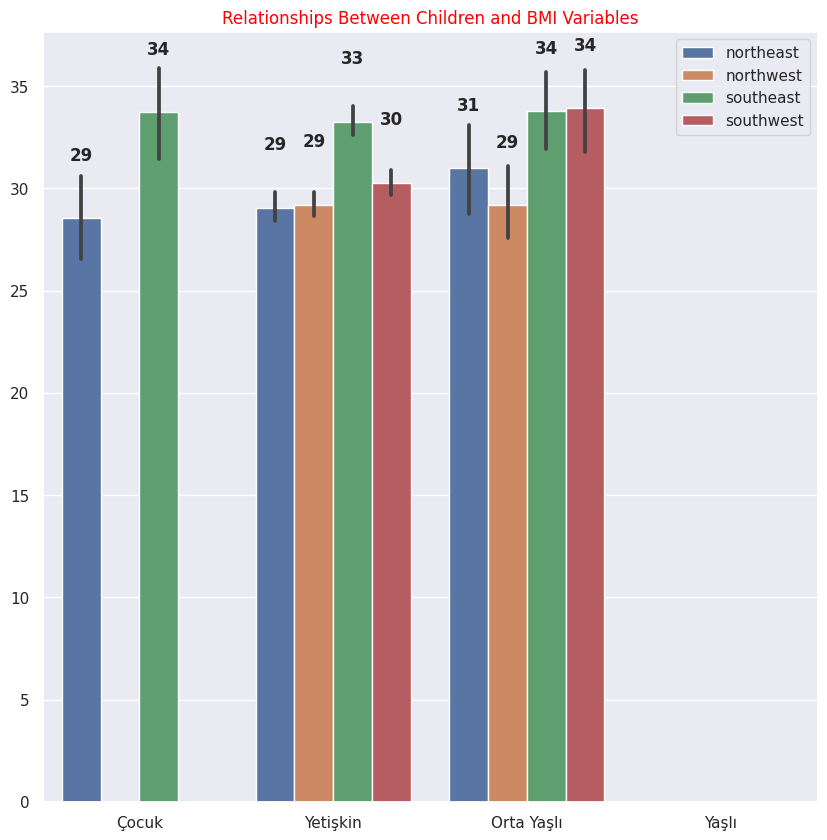

In [393]:
ax=sns.barplot(x=pd.cut(df['age'].values,bins=[0,18,59,80,120],labels=["Child","Adult","Middle Aged","Old"],include_lowest=True),y=df["bmi"].values,hue=df["region"])
plt.title("Relationships Between Children and BMI Variables",color="red")
plt.legend(loc=1)
for p in ax.patches:
   ax.annotate(format(p.get_height(),".0f"),
              (p.get_x()+ p.get_width()/2,p.get_height()+3),
              ha = 'center', va = 'center',
              xytext=(0,1),
              textcoords="offset points",
              fontweight="bold")

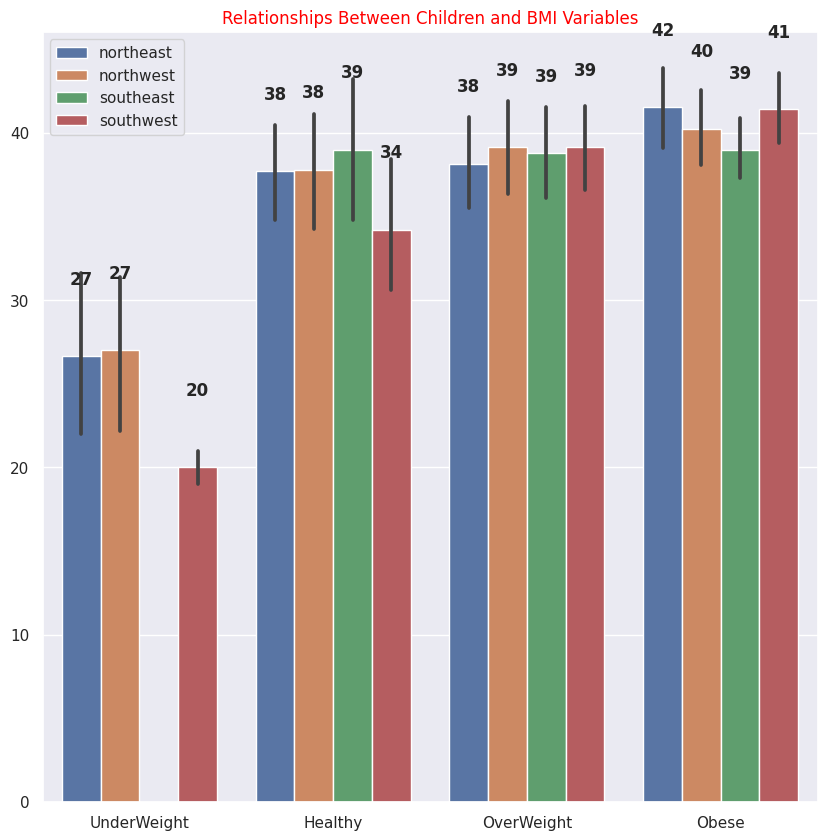

In [394]:
ax=sns.barplot(x=pd.cut(df['bmi'].values,bins=[0,18,25,30,df['bmi'].max()],labels=["UnderWeight","Healthy","OverWeight","Obese"],include_lowest=True),y=df["age"].values,hue=df["region"])
plt.title("Relationships Between Children and BMI Variables",color="red")
plt.legend(loc=2)
for p in ax.patches:
   ax.annotate(format(p.get_height(),".0f"),
              (p.get_x()+ p.get_width()/2,p.get_height()+4.5),
              ha = 'center', va = 'center',
              xytext=(0,1),
              textcoords="offset points",
              fontweight="bold")

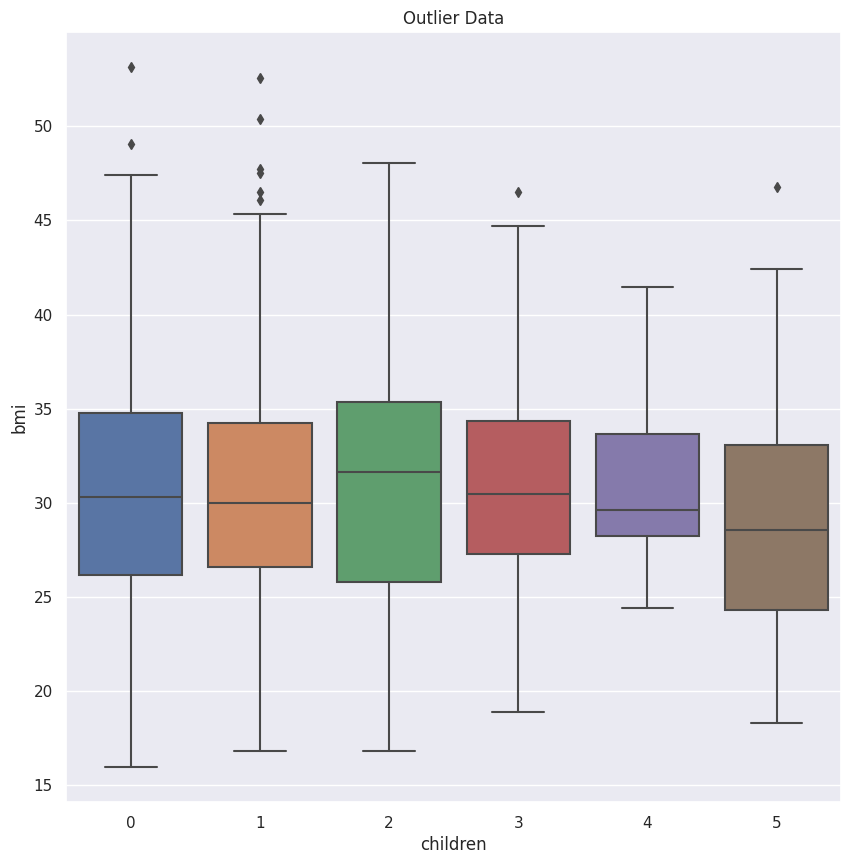

In [395]:
sns.boxplot(data=df,x="children",y="bmi")
plt.title("Outlier Data")
plt.show()

<Axes: xlabel='region', ylabel='charges'>

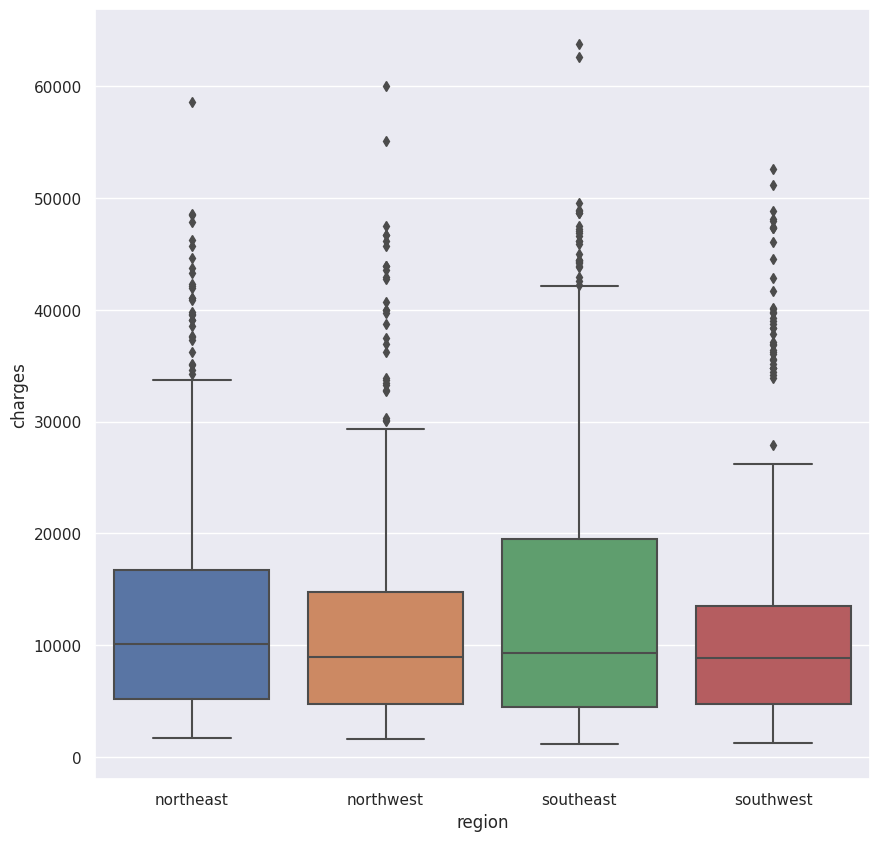

In [396]:
sns.boxplot(data=df,x="region",y="charges")

In [397]:
mean=df['bmi'].mean()
lower=mean-3*df['bmi'].std()
upper=3*df['bmi'].std()+mean
len(df[df['bmi']>upper]),len(df[df['bmi']<lower]),lower,upper,df['bmi'].std()

(4, 0, 12.368836125949507, 48.95795759602359, 6.098186911679014)

In [398]:
df_upper=df[df['bmi']>upper]
df_lower=df[df['bmi']<lower]
print(df_upper,df_lower,sep='\n\n')

      age   sex    bmi  children smoker     region     charges
116    58  male  49.06         0     no  southeast  11381.3254
847    23  male  50.38         1     no  southeast   2438.0552
1047   22  male  52.58         1    yes  southeast  44501.3982
1317   18  male  53.13         0     no  southeast   1163.4627

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


In [399]:
df=df[(df['bmi']>=lower) & (df['bmi']<=upper)]
df['bmi'].min(),df['bmi'].max(),df['bmi'].std()

(15.96, 48.07, 6.000927253768582)

<Axes: xlabel='bmi'>

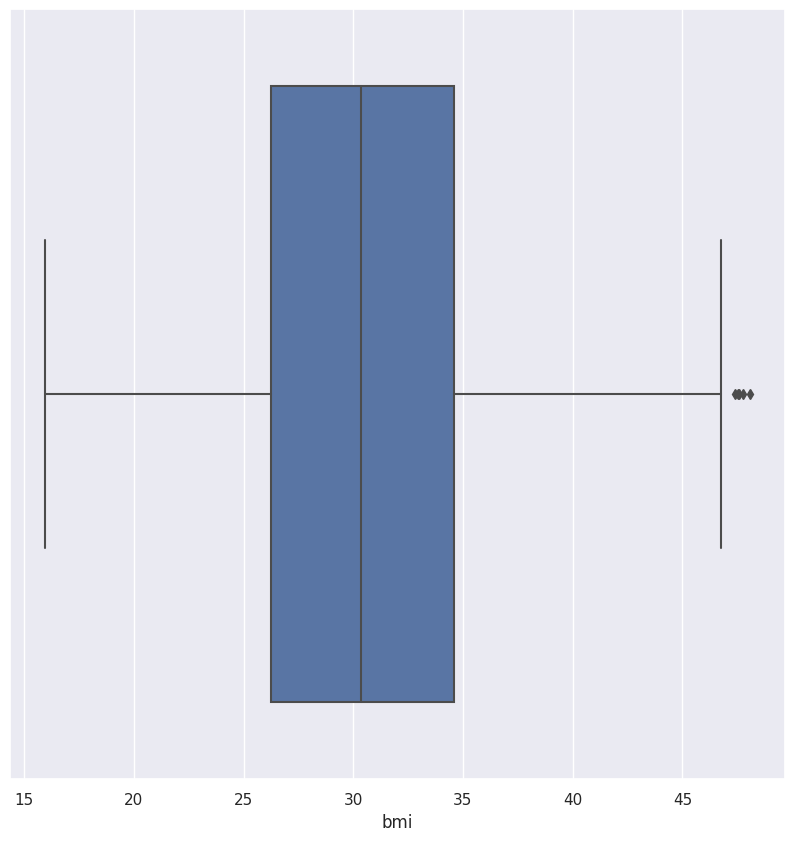

In [400]:
sns.boxplot(data=df,x="bmi")

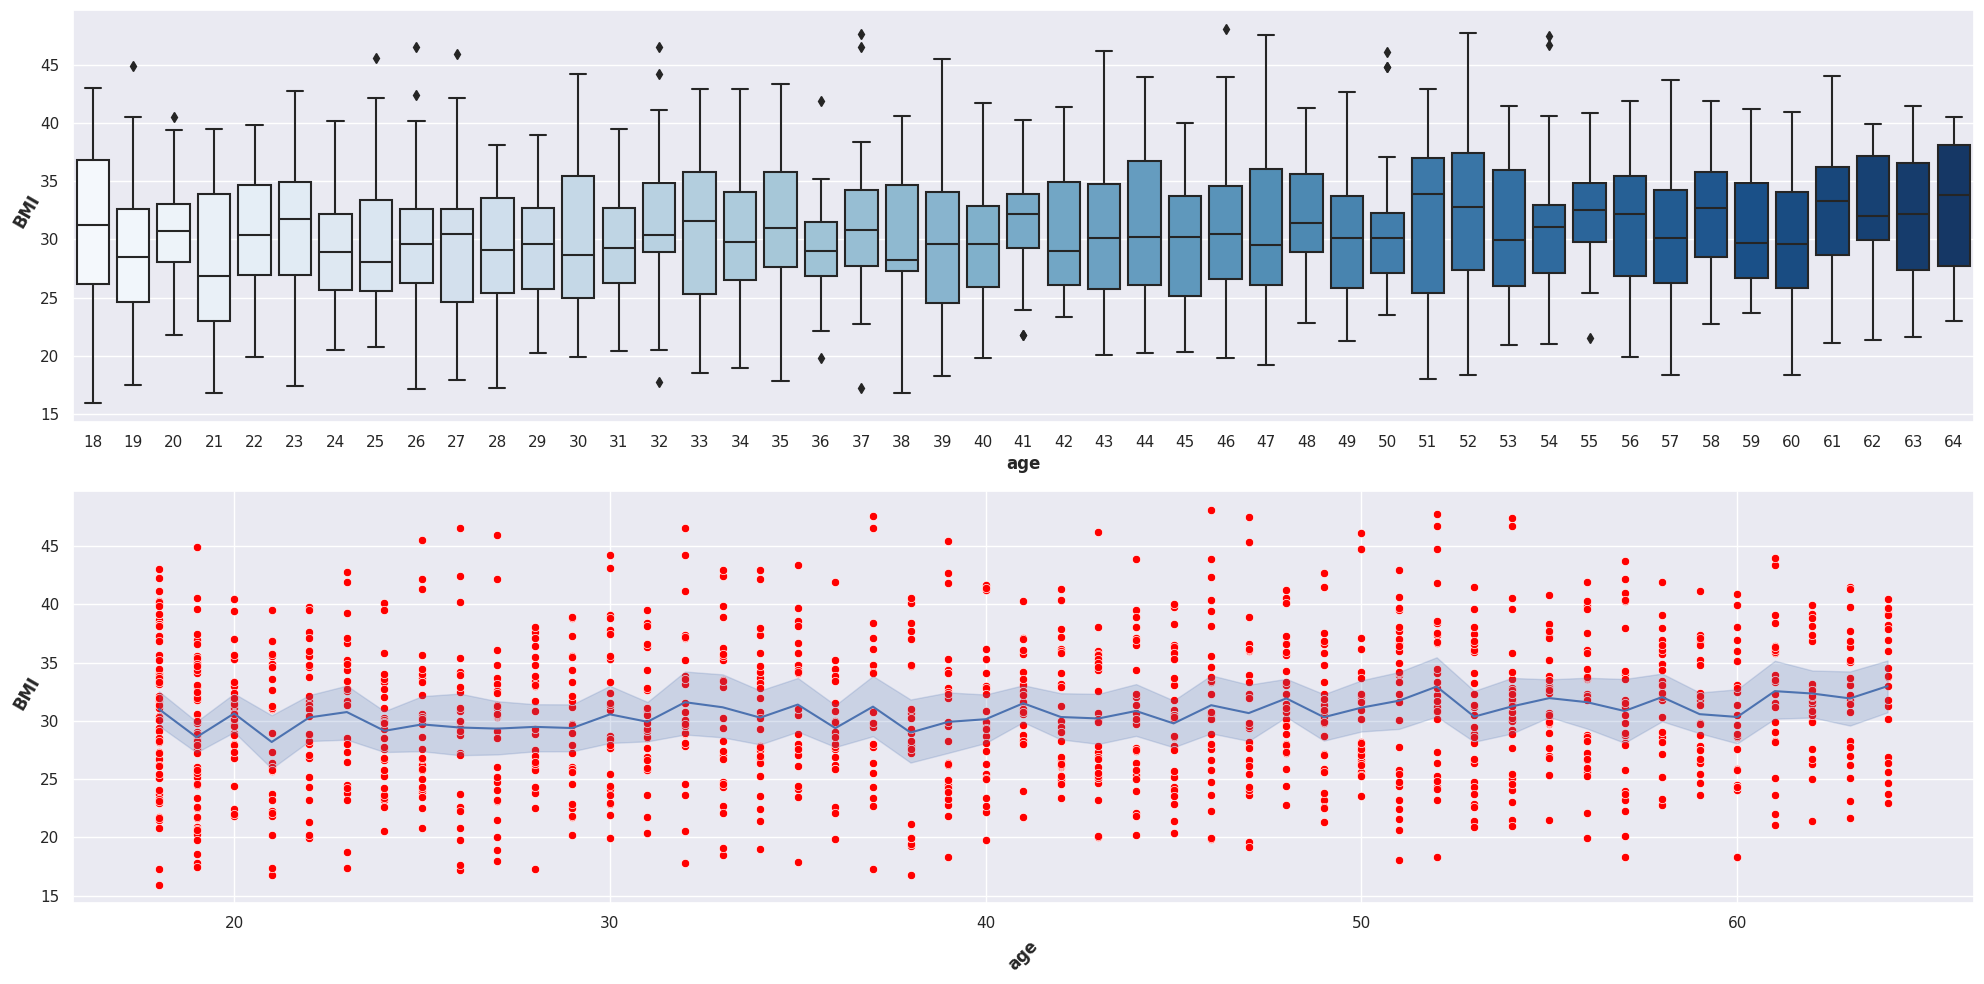

In [401]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.boxplot(data=df,x="age",y="bmi",palette="Blues")
plt.xlabel("age",fontweight="bold")
plt.ylabel("BMI",fontweight="bold",rotation=60)
plt.subplot(2,1,2)
sns.scatterplot(data=df,x="age",y='bmi',color="red")
sns.lineplot(data=df,x="age",y="bmi")
plt.xlabel("age",fontweight="bold",rotation=45)
plt.ylabel("BMI",fontweight="bold",rotation=60)
plt.tight_layout()

<Axes: xlabel='bmi', ylabel='charges'>

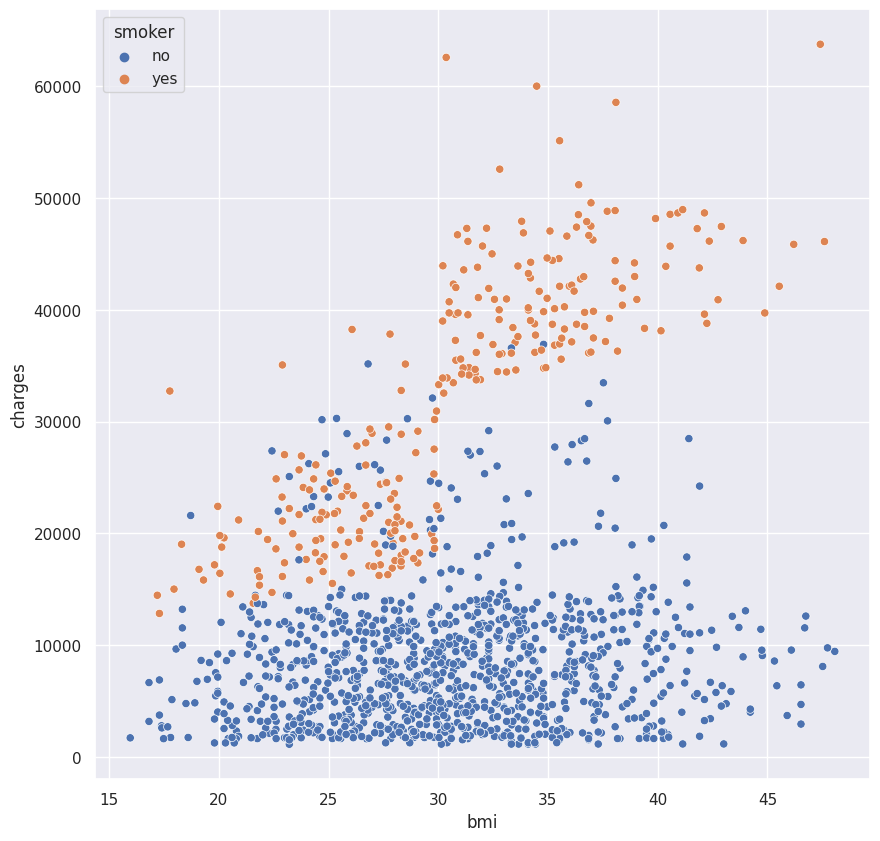

In [402]:
sns.scatterplot(data=df,x="bmi",y="charges",hue="smoker")

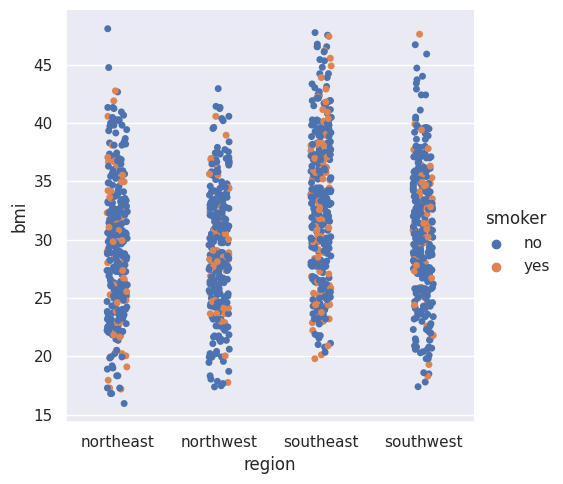

In [403]:
sns.catplot(data=df,x="region",y="bmi",hue="smoker")

In [404]:
encoder=LabelEncoder()
categorical_list=df.select_dtypes("category").columns
for cat in categorical_list:
  df[cat]=encoder.fit_transform(df[cat])


In [405]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019041,0.118887,0.042345,-0.023820,0.002974,0.301360
sex,-0.019041,1.000000,0.037031,0.018667,0.076096,0.003293,0.057165
bmi,0.118887,0.037031,1.000000,0.018054,0.002264,0.155877,0.200799
children,0.042345,0.018667,0.018054,1.000000,0.007087,0.017234,0.067569
smoker,-0.023820,0.076096,0.002264,0.007087,1.000000,-0.002333,0.786536
region,0.002974,0.003293,0.155877,0.017234,-0.002333,1.000000,-0.006404
charges,0.301360,0.057165,0.200799,0.067569,0.786536,-0.006404,1.000000


<Axes: >

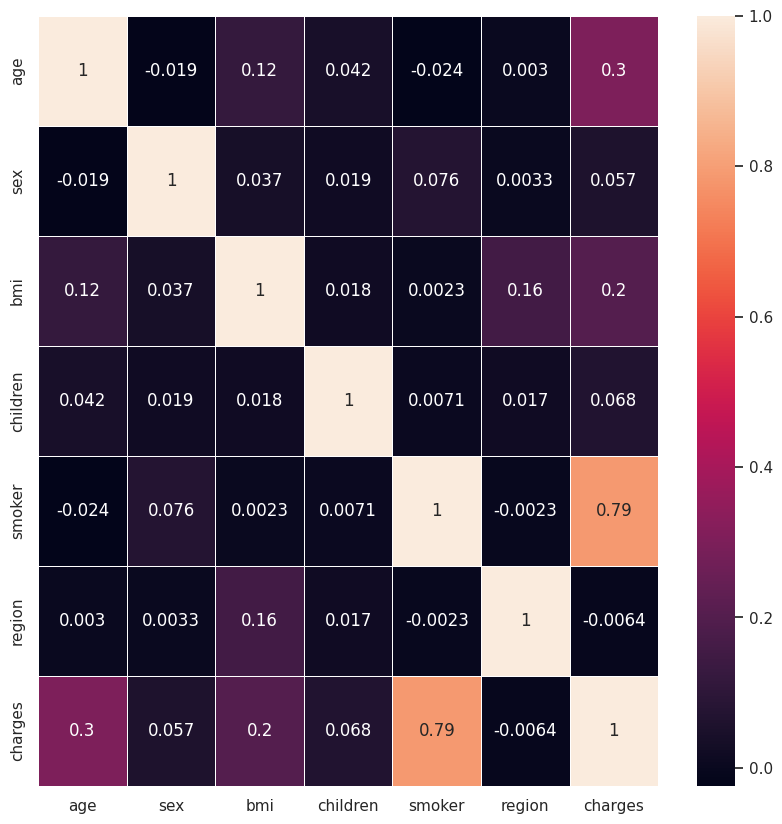

In [406]:
sns.heatmap(df.corr(),annot=True,linewidths=0.5)

In [407]:
y=df['charges']
x=df.drop('charges',axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,train_size=0.7,random_state=42)

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [408]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
lin_reg_score=lin_reg.score(X_train,Y_train)
lin_reg_score_R2=r2_score(Y_test,y_pred)
print(lin_reg_score_R2)

0.7544012423275612


In [409]:
lin_reg.coef_,lin_reg.intercept_

(array([3338.46853278,  -56.98691544, 1965.81519707,  646.35231943,
        9707.3734296 , -574.43821618]),
 13276.054171992499)

In [410]:
rand_for_reg=RandomForestRegressor(max_depth = 5, n_estimators=600)
rand_for_reg.fit(X_train,Y_train)
y_pred=rand_for_reg.predict(X_test)
rand_for_reg_score=rand_for_reg.score(X_train,Y_train)
rand_for_reg_score_R2=r2_score(Y_test,y_pred)
print(r2_score(Y_test,y_pred))
print(rand_for_reg_score_R2)

0.8606257047536097
0.8606257047536097


In [411]:
dec_tree=DecisionTreeRegressor(max_depth=5)
dec_tree.fit(X_train,Y_train)
y_pred=dec_tree.predict(X_test)
dec_tree_score=dec_tree.score(X_train,Y_train)
dec_tree_score_R2=r2_score(Y_test,y_pred)
print(dec_tree_score_R2,dec_tree_score,sep='\n')

0.8503853204830908
0.8843111643477711


In [412]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,Y_train)
y_pred=xgb.predict(X_test)
xgb_score=xgb.score(X_train,Y_train)
xgb_score_R2=r2_score(Y_test,y_pred)
print(xgb_score_R2,xgb_score,sep='\n')

0.8083278917145291
0.9968219727261812


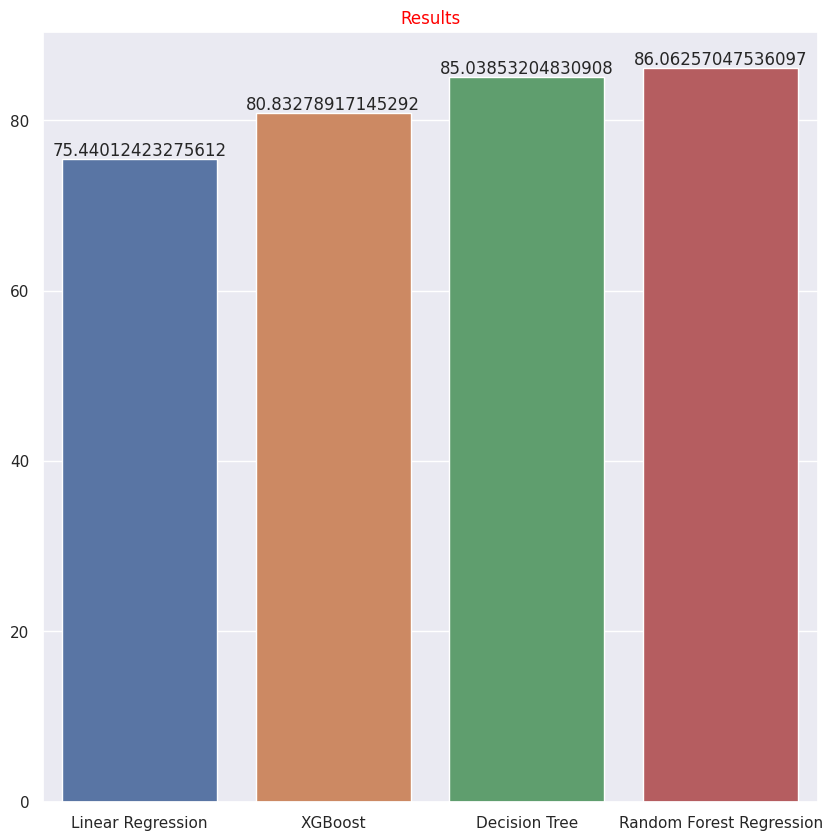

In [413]:
method=["Linear Regression","XGBoost","Decision Tree","Random Forest Regression"]
r2_score_method=[lin_reg_score_R2,xgb_score_R2,dec_tree_score_R2,rand_for_reg_score_R2]
percentage=[x*100 for x in r2_score_method]
ax=sns.barplot(x=method,y=percentage)
plt.title("Results",color="red")
for index,label,r2 in zip([i for i in range(0,5)],method,percentage):
  plt.text(index,r2,str(r2),ha='center', va='bottom')